# Ebb & Flow

This will be the first in a series of documents that looks to use mathematics in philosphical reasoning with application to the financial markets. More specifically, the purpose of this journal will be to explore investment ideas and test their merit by performing simple quantitative analysis.

Please note the word "simple". I will make a concerted effort to reason with common sense and use intuition as a guiding principle in my research. I will look to avoid overfitting data and perhaps even more importantly, overfitting perception.

__Throughout my research, there will be a lack of findings at least as often as there are significant findings__. This is to be expected in financial research. In statistical terms, we can think of a lack of findings as accepting the null hypothesis.


Lets get started:

## The VIX and the Stock Market

It is a widely established belief that that there is a strong negative relationship between the Volatility Index and the stock market. Before we dive into the specifics of what exactly this means, lets use the S&P 500 to represent our stock universe and calculate daily returns of the SP500: 

In [120]:
import pandas as p

csv = "vixcurrent.csv"
vix = p.read_csv(csv, index_col=0).iloc[:,0:2]
vix = vix[vix.VIX != 0]
vix.tail(n=5)

vix = vix.astype(float)
vix['SP500_ret'] = vix['SP500']/vix['SP500'].shift(1)-1
vix = vix.iloc[1:len(vix)]
vix.head(n=5)

,SP500,VIX,SP500_ret
DATE,,,
2/12/2008,1348.86,26.33,0.007266
2/13/2008,1367.21,24.88,0.013604
2/14/2008,1348.86,25.54,-0.013421
2/15/2008,1349.99,25.02,0.000838
2/19/2008,1348.78,25.59,-0.000896


Lets look at the relationship between the level of the VIX and the daily return of the SP500 using a simple linear regression:

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SP500_ret   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     43.41
Date:                Thu, 22 Feb 2018   Prob (F-statistic):           5.40e-11
Time:                        19:33:01   Log-Likelihood:                 7415.9
No. Observations:                2518   AIC:                        -1.483e+04
Df Residuals:                    2516   BIC:                        -1.482e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0037      0.001      6.507      0.000       0.003       0.005
VIX           -0.0002   2.54e-05     -6.588      0.000      -0.000      -0.000
==============================================================================
Omnibus:                      645.389   Durbin-Watson:                   2.195
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16051.100
Skew:                           0.631   Prob(JB):                         0.00
Kurtosis:                      15.304   Cond. No.                         49.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

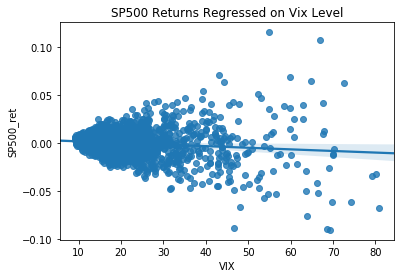

In [121]:
import statsmodels.api as sm
import seaborn as graph

Y = vix['SP500_ret']
X = vix['VIX']
graph.regplot(X,Y).set_title("SP500 Returns Regressed on Vix Level") #seaborn adds constant automatically

X = sm.add_constant(X) # in statsmodels, a constant needs to be added
ols_model = sm.OLS(Y,X)
results = ols_model.fit()
results.summary()

At least on a daily basis, we can infer from the results above that the level of the VIX explains little to none of SP500 return. Now, indead of looking at the level of the VIX, lets look at the change in the level of the VIX which I will refer to as Delta_VIX:

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SP500_ret   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     5697.
Date:                Thu, 22 Feb 2018   Prob (F-statistic):               0.00
Time:                        19:33:05   Log-Likelihood:                 8880.4
No. Observations:                2517   AIC:                        -1.776e+04
Df Residuals:                    2515   BIC:                        -1.775e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      2.486      0.013    7.44e-05       0.001
Delta_VIX     -0.0054   7.19e-05    -75.480      0.000      -0.006      -0.005
==============================================================================
Omnibus:                      512.841   Durbin-Watson:                   2.150
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12822.177
Skew:                           0.308   Prob(JB):                         0.00
Kurtosis:                      14.040   Cond. No.                         1.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

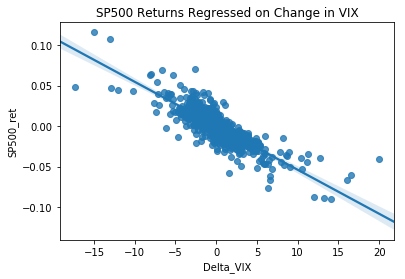

In [122]:
vix['Delta_VIX'] = vix['VIX'] - vix['VIX'].shift(1)
vix = vix.iloc[1:len(vix)]

Y = vix['SP500_ret']
X = vix['Delta_VIX']
graph.regplot(X,Y).set_title("SP500 Returns Regressed on Change in VIX")

X = sm.add_constant(X)
ols_model = sm.OLS(Y,X)
results = ols_model.fit()
results.summary()

Here we see a lot more significance. Roughly speaking, in our sample, 70 percent of the variability in SP500 returns can be explained by Delta_VIX. While this is a very interesting inference, it does not help us PREDICT the return of the SP500. 

In order to predict the SP500 return with this inference we must either 1) have a way of predicting volatility which will in turn help us predict direction due to the relationship or 2) somehow lag the data and analyze how a change in a previous period VIX level (Delta_VIX) will predict the current SP500 return.

Lets start with number 2 since it will be the easiest first step. Lets lag Delta_VIX and see how it performs as a predictor of next period returns:

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SP500_ret   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     22.50
Date:                Thu, 22 Feb 2018   Prob (F-statistic):           2.22e-06
Time:                        19:33:14   Log-Likelihood:                 7399.4
No. Observations:                2516   AIC:                        -1.479e+04
Df Residuals:                    2514   BIC:                        -1.478e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0003      0.000      1.331      0.183      -0.000       0.001
Delta_VIX_lag     0.0006      0.000      4.743      0.000       0.000       0.001
==============================================================================
Omnibus:                      500.015   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13580.762
Skew:                          -0.208   Prob(JB):                         0.00
Kurtosis:                      14.374   Cond. No.                         1.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

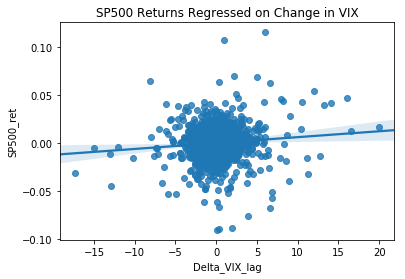

In [123]:
vix['Delta_VIX_lag'] = vix['Delta_VIX'].shift(1)
vix = vix.iloc[1:len(vix)]

Y = vix['SP500_ret']
X = vix['Delta_VIX_lag']
graph.regplot(X,Y).set_title("SP500 Returns Regressed on Change in VIX")

X = sm.add_constant(X)
ols_model = sm.OLS(Y,X)
results = ols_model.fit()
results.summary()

While this is not the most exciting result in the sense that the 1-day lagged change in the VIX does NOT predict next day returns very well, it is an interesting result nonetheless. We notice that a large change in the VIX one day does not strongly explain the return of the next day (we will look more at outliers and their importance / lack of importance in just a bit).

These results can be interesting when applied intuitively. We have seen that there is a strong negative relationship between Delta_VIX and the stock market on any given day. We have also seen that a large change in the VIX, on average, does not explain a large portion of the following days return variability.

What if we believe the stock market will go up over the next year? This analysis WOULD NOT help us explicitly with that prediction but it WOULD help us think about efficient times to buy.

I will soon explore how trading after large changes in the VIX in one day will perform __over time periods significantly longer than a day__.

First I want to use a Vector Autoregressive model to look at the VIX SP500 relationship in the context of autocorrelation.

In [41]:
%%capture 
from statsmodels.tsa.vector_ar import var_model as var

var_xy = vix[['SP500_ret','Delta_VIX']]
var_xy.index = p.to_datetime(var_xy.index)
var_model = var.VAR(var_xy)
var_res = var_model.fit(5)

In [39]:
var_res.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 22, Feb, 2018
Time:                     14:12:39
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -8.53003
Nobs:                     2510.00    HQIC:                  -8.56258
Log likelihood:           3668.23    FPE:                0.000187615
AIC:                     -8.58112    Det(Omega_mle):     0.000185982
--------------------------------------------------------------------
Results for equation SP500_ret
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.000345         0.000255            1.352           0.177
L1.SP500_ret        -0.063284         0.036016           -1.757           0.079
L1.Delta_VIX         0.000375         0.000236            1.

Based on this vector autoregression, which is by construction a multiple regression, it seems that when we control for autocorrelation in the SP500, a significant portion of the variablility that we previously explained by DELTA_VIX dissapears. This does not mean that there is no merit in our previous analysis (in fact, our t-stats are about the same in each case), but it is useful to know that stocks exhibit negative short term autocorrelation - and that this autocorrelation explains a similar portion of the variablility of SP500 returns as our previous analysis. __Edit: it is important to notice here that Delta_VIX is autocorrelated with significance at lags 1,2,3 and 4.  Also Delta_VIX is weirdly significant at lag 4 as a predictior of SP500 return__ 

Please also note that it is conventional to test for stationarity using a test such as adfuller when using vector autoregression. Both SP500 __returns__ (not price level) and Delta_VIX are stationary processes with strong signifiance so they meet the assumptions of our model.

Next I want to look into whether longer term return of the SP500 is associated with a 1 day change in the VIX. To do this, I will calculate rolling intervals of return after each daily change in the VIX (Delta_VIX). More specifically, I will look at the yearly return following a 1 day change in the VIX. I also want to condition on extreme cases to determine if we can time trade entry. It does not make sense to windsorize Delta_VIX values as extreme values are the most important in determining if we can time trade entry.

I will look at the top and bottom two percent of Delta_VIX days __based on a trailing rolling percentile window to avoid data snooping__ to see how they predict return over the following year. To reiterate, the top 2 percent will be the days with the largest increase in the VIX level, and the bottom 2 percent will be the days with the largest decrease in the VIX level.

In [125]:
%%capture
import numpy as np

vix['252_Day_ret'] = vix['SP500']/vix['SP500'].shift(252)-1
vix['Delta_vix_t-252'] = vix['Delta_VIX'].shift(252)

to_label = list(range(1,51))
vix['Rolling_Percentile'] = p.rolling_apply(vix['Delta_vix_t-252'],252,lambda x: p.qcut(x,50,labels=to_label)[49])

top2percent = vix.loc[vix['Rolling_Percentile']==50]
bottom2percent = vix.loc[vix['Rolling_Percentile']==1]

In [126]:
print("Mean of 252-day returns for top 2 percent = %s" % np.mean(top2percent['252_Day_ret']))
print("SD of 252-day returns for top 2 percent = %s" % np.std(top2percent['252_Day_ret']))

print("Mean of 252-day returns for bottom 2 percent = %s" % np.mean(bottom2percent['252_Day_ret']))
print("SD of 252-day returns for bottom 2 percent = %s" % np.std(bottom2percent['252_Day_ret']))

print("Mean of 252-day returns for any day in samlple = %s" % np.mean(vix['252_Day_ret']))
print("SD of 252-day returns for any day in samlple = %s" % np.std(vix['252_Day_ret']))

Mean of 252-day returns for top 2 percent = 0.1253783900774361
SD of 252-day returns for top 2 percent = 0.0788641352421376
Mean of 252-day returns for bottom 2 percent = 0.12683122648941644
SD of 252-day returns for bottom 2 percent = 0.06415415920393208
Mean of 252-day returns for any day in samlple = 0.10375008082764262
SD of 252-day returns for any day in samlple = 0.15225327780834472


This is interesting, not exactly the result I was expecting but also not a bad result either as we can see we are clearly outperforming just blindly buying stocks at any point in time. I think, intuitively, that using a 1 day time horizon to time trades is too short due to the nature of volatility. Delta_VIX is autocorreltated, as we have seen before, and any sort of volatility model (such as GARCH) takes notice of this autocorrelation in an effort to predict volatility. 

It was unexpected that the bottom 2 percent performed just as well as the top 2 percent. This makes me think that the driver is the standard deviation of the VIX, not the mean of the VIX. This actually makes intuitive sense and I will return to this later.

The next step here is to get rid of this short term autocorrelation so it does not affect our results. To do this, I will extend my 1 day Delta_VIX calculation as a predictor of yearly SP500 return. To determine how much to extend, I will look at the partial autocorrelation of the Delta_VIX:

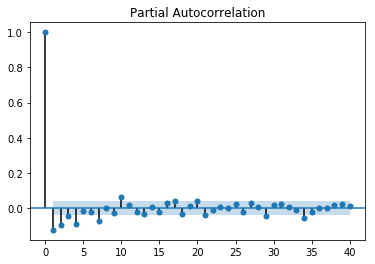

In [101]:
from statsmodels.graphics import tsaplots
out1 = plot_pacf(vix['Delta_VIX'],lags=40)

Looking at this PACF, the lag values that make the most intuitive sense are 4,7,29 and 34. It makes sense fundamentally to use these values, as when a market overreacts and sells off, it typically does so over the course of several days or weeks or even months. The market fit does not happen all in one day. Now, when we run our analysis, instead of looking at the 1 day Delta_VIX, lets look at the 21 day Delta_VIX. I choose 21 here for more intuitive reasons than statistical ones. I think looking at 4-7 days as a predictor of a year out is a bit too short. We don't say Apple stock is doomed after 1 bad day.  After bad month, however, it starts to garner more attention.

In [127]:
%%capture
vix['21day_Delta_VIX'] = vix['VIX'] - vix['VIX'].shift(21)
vix['21day_Delta_vix_t-252'] = vix['21day_Delta_VIX'].shift(252)

vix['21Day_Rolling_Percentile'] = p.rolling_apply(vix['21day_Delta_vix_t-252'],252,lambda x: p.qcut(x,50,labels=to_label)[49])

top2percent_21Day = vix.loc[vix['21Day_Rolling_Percentile']==50]
bottom2percent_21Day = vix.loc[vix['21Day_Rolling_Percentile']==1]

In [128]:
print("21 Day Window: Mean of 252-day returns for top 2 percent = %s" % np.mean(top2percent_21Day['252_Day_ret']))
print("21 Day Window: SD of 252-day returns for top 2 percent = %s" % np.std(top2percent_21Day['252_Day_ret']))

print("21 Day Window: Mean of 252-day returns for bottom 2 percent = %s" % np.mean(bottom2percent_21Day['252_Day_ret']))
print("21 Day Window: SD of 252-day returns for bottom 2 percent = %s" % np.std(bottom2percent_21Day['252_Day_ret']))

print("Mean of 252-day returns for any day in samlple = %s" % np.mean(vix['252_Day_ret']))
print("SD of 252-day returns for any day in samlple = %s" % np.std(vix['252_Day_ret']))

21 Day Window: Mean of 252-day returns for top 2 percent = 0.1369056976091045
21 Day Window: SD of 252-day returns for top 2 percent = 0.06518229999597382
21 Day Window: Mean of 252-day returns for bottom 2 percent = 0.12084205539501752
21 Day Window: SD of 252-day returns for bottom 2 percent = 0.06219130773752717
Mean of 252-day returns for any day in samlple = 0.10375008082764262
SD of 252-day returns for any day in samlple = 0.15225327780834472


Not bad, we squeezed another 1.4% on average out of our top 2 percent, which is what we set out to analyze. Once again, our bottom two percent is performing well above blindly buying the market. Next steps will be to look at SD of VIX, possibly experiment with other time frames besides just 21 days, and definitely look at idiosyncratic movement. FX short term volume signal is also in the works. 